In [1]:
import pandas as pd

uri = 'https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv'

dados = pd.read_csv(uri)
dados.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [2]:
renomeando_colunas = {
    'mileage_per_year':'milhas_por_ano',
    'model_year':'ano_do_modelo',
    'price':'preco',
    'sold':'vendido'
}
dados.rename(columns=renomeando_colunas, inplace=True)

In [3]:
substituir_coluna_vendido = {
    'yes':1,
    'no':0
}

dados['vendido'] = dados['vendido'].map(substituir_coluna_vendido)
dados.drop(columns='Unnamed: 0', inplace=True)

In [4]:
dados.head()

,milhas_por_ano,ano_do_modelo,preco,vendido
0,21801,2000,30941.02,1
1,7843,1998,40557.96,1
2,7109,2006,89627.50,0
3,26823,2015,95276.14,0
4,7935,2014,117384.68,1


In [5]:
from datetime import datetime
ano_atual = datetime.today().year

dados['idade_do_modelo'] = ano_atual - dados['ano_do_modelo']
dados.head()

,milhas_por_ano,ano_do_modelo,preco,vendido,idade_do_modelo
0,21801,2000,30941.02,1,24
1,7843,1998,40557.96,1,26
2,7109,2006,89627.50,0,18
3,26823,2015,95276.14,0,9
4,7935,2014,117384.68,1,10


In [6]:
dados['km_por_ano'] = dados['milhas_por_ano'] * 1.60934
dados.drop(columns={
    'milhas_por_ano',
    'ano_do_modelo'
},
inplace=True)

In [7]:
dados.head()

,preco,vendido,idade_do_modelo,km_por_ano
0,30941.02,1,24,35085.22134
1,40557.96,1,26,12622.05362
2,89627.50,0,18,11440.79806
3,95276.14,0,9,43167.32682
4,117384.68,1,10,12770.11290


In [8]:
dados.shape[0]

10000

In [9]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

In [10]:
x =  dados[['preco', 'idade_do_modelo', 'km_por_ano']]
y = dados['vendido']

In [11]:
#semente
np.random.seed(20)

treino_x, teste_x, treino_y, teste_y = train_test_split(
    dados[['preco', 'idade_do_modelo', 'km_por_ano']], 
    dados['vendido'],
    stratify=dados['vendido'],
    test_size=0.25
)

print(f'O número de itens para o treino foi: {len(treino_x)}')
print(f'O número de itens para teste foi: {len(teste_y)}')

O número de itens para o treino foi: 7500
O número de itens para teste foi: 2500


In [12]:
model = LinearSVC(dual=True)
model.fit(treino_x, treino_y)
previsao = model.predict(teste_x)
#acuracia = accuracy_score(teste_y, previsao)
score_original = model.score(teste_x, teste_y)
print(f'Treinamos com {len(treino_x)} e testaremos com {len(teste_x)}')

#print(f'A acurácia foi de: {acuracia*100:.4}%')
print(f'O score {score_original}')

Treinamos com 7500 e testaremos com 2500
O score 0.5696


e:\git\machine_learning\classificacao_com_sklearn\venv\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [13]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier()

dummy.fit(treino_x, treino_y)
previsao = dummy.predict(teste_x)
#acuracia = accuracy_score(teste_y, previsao)
score_dummy = dummy.score(teste_x, teste_y)
print(f'Treinamos com {len(treino_x)} e testaremos com {len(teste_x)}')
print(f'Score Dummy: {score_dummy}')
#print(f'A acurácia do DUMMY: {acuracia*100:.4}%')

Treinamos com 7500 e testaremos com 2500
Score Dummy: 0.58


In [14]:
from sklearn.dummy import DummyClassifier

dummy_mostfrequent = DummyClassifier()

dummy_mostfrequent.fit(treino_x, treino_y)
previsao = dummy_mostfrequent.predict(teste_x)
acuracia = accuracy_score(teste_y, previsao)

print(f'Treinamos com {len(treino_x)} e testaremos com {len(teste_x)}')

print(f'A acurácia do DUMMY MOST FREQUENT: {acuracia*100:.4}%')

Treinamos com 7500 e testaremos com 2500
A acurácia do DUMMY MOST FREQUENT: 58.0%


In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

SEED = 5
np.random.seed(SEED)
raw_treino_x, raw_teste_x, treino_y,  teste_y = train_test_split(
    x, 
    y, 
    test_size=0.25,
    stratify=y
)

print(f'Treinaremos com {len(raw_treino_x)} e testaremos com {len(raw_teste_x)}')

scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

modelo = SVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)


acuracia = accuracy_score(teste_y, previsoes) * 100

print(f'A acurácia foi de {acuracia:.5}%')

Treinaremos com 7500 e testaremos com 2500
A acurácia foi de 77.48%


In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

SEED = 5
np.random.seed(SEED)
raw_treino_x, raw_teste_x, treino_y,  teste_y = train_test_split(
    x, 
    y, 
    test_size=0.25,
    stratify=y
)

print(f'Treinaremos com {len(raw_treino_x)} e testaremos com {len(raw_teste_x)}')

scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

modelo = DecisionTreeClassifier(max_depth=2)
modelo.fit(raw_treino_x, treino_y)
previsoes = modelo.predict(raw_teste_x)


acuracia = accuracy_score(teste_y, previsoes) * 100

print(f'A acurácia foi de {acuracia:.5}%')

Treinaremos com 7500 e testaremos com 2500
A acurácia foi de 76.84%


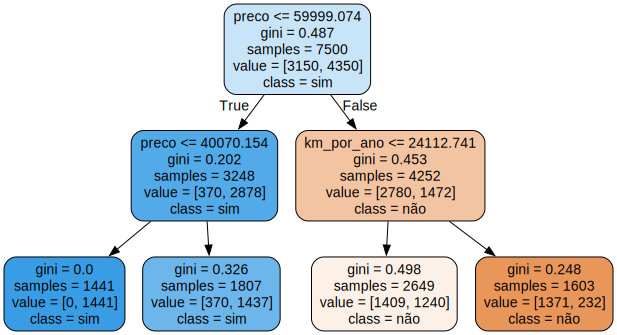

In [17]:
from sklearn.tree import export_graphviz
import graphviz
features = x.columns
dot_data = export_graphviz(
                        modelo, 
                        out_file=None,
                        feature_names=features,
                        filled=True,
                        rounded=True,
                        class_names=['não', 'sim']
                        )
grafico = graphviz.Source(dot_data)
grafico

In [18]:
y

0       1
1       1
2       0
3       0
4       1
       ..
9995    0
9996    1
9997    0
9998    1
9999    0
Name: vendido, Length: 10000, dtype: int64

In [19]:
SEED = 158020
np.random.seed(SEED)
treino_x, teste_x, treino_y,  teste_y = train_test_split(
    x, 
    y, 
    test_size=0.25,
    stratify=y
)

print(f'Treinaremos com {len(treino_x)} e testaremos com {len(teste_x)}')

modelo = DecisionTreeClassifier(max_depth=2)
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)


acuracia = accuracy_score(teste_y, previsoes) * 100

print(f'A acurácia foi de {acuracia:.5}%')

Treinaremos com 7500 e testaremos com 2500
A acurácia foi de 71.92%


In [20]:
from sklearn.model_selection import cross_validate

SEED = 158020
np.random.seed(SEED)

modelo = DecisionTreeClassifier(max_depth=2)
results = cross_validate(modelo, x, y, cv=3, return_train_score=False)
results


{'fit_time': array([0.00500846, 0.00451159, 0.00550938]),
 'score_time': array([0.00199342, 0.00100493, 0.00100088]),
 'test_score': array([0.75704859, 0.7629763 , 0.75337534])}

In [21]:
media = results['test_score'].mean()
desvio_padrao = results['test_score'].std()

print(f'A acuracia com o Cross Validation com a divisão de 3 conjuntos é: [{(media - 2 * desvio_padrao)*100:.4} , {(media + 2 * desvio_padrao) * 100:.4}]')

A acuracia com o Cross Validation com a divisão de 3 conjuntos é: [74.99 , 76.57]


In [22]:
SEED = 158020
np.random.seed(SEED)

modelo = DecisionTreeClassifier(max_depth=2)
results = cross_validate(modelo, x, y, cv=10, return_train_score=False)
results

media = results['test_score'].mean()
desvio_padrao = results['test_score'].std()

print(f'A acuracia com o Cross Validation com a divisão de 10 conjuntos é: [{(media - 2 * desvio_padrao)*100:.4} , {(media + 2 * desvio_padrao) * 100:.4}]')

A acuracia com o Cross Validation com a divisão de 10 conjuntos é: [74.24 , 77.32]


In [23]:
SEED = 158020
np.random.seed(SEED)

modelo = DecisionTreeClassifier(max_depth=2)
results = cross_validate(modelo, x, y, cv=5, return_train_score=False)
results

media = results['test_score'].mean()
desvio_padrao = results['test_score'].std()

print(f'A acuracia com o Cross Validation com a divisão de 5 conjuntos é: [{(media - 2 * desvio_padrao)*100:.4} , {(media + 2 * desvio_padrao) * 100:.4}]')

A acuracia com o Cross Validation com a divisão de 5 conjuntos é: [75.21 , 76.35]


In [24]:
SEED = 158020
np.random.seed(SEED)

modelo = DecisionTreeClassifier(max_depth=2)
results = cross_validate(modelo, x, y, cv=10, return_train_score=False)
results

media = results['test_score'].mean()
desvio_padrao = results['test_score'].std()

print(f'A acuracia com o Cross Validation com a divisão de 3 conjuntos é: [{(media - 2 * desvio_padrao)*100:.4} , {(media + 2 * desvio_padrao) * 100:.4}]')

A acuracia com o Cross Validation com a divisão de 3 conjuntos é: [74.24 , 77.32]


In [25]:
from sklearn.model_selection import KFold
SEED = 158020
np.random.seed(SEED)
cv = KFold(n_splits=10)


modelo = DecisionTreeClassifier(max_depth=2)
results = cross_validate(modelo, x, y, cv=cv, return_train_score=False)
results

media = results['test_score'].mean()
desvio_padrao = results['test_score'].std()

print(f'A acuracia com o Cross Validation com a divisão de 3 conjuntos é: [{(media - 2 * desvio_padrao)*100:.4} , {(media + 2 * desvio_padrao) * 100:.4}]')

A acuracia com o Cross Validation com a divisão de 3 conjuntos é: [74.37 , 77.19]


In [26]:
SEED = 158020
np.random.seed(SEED)

cv = KFold(n_splits=10, shuffle=True)

modelo = DecisionTreeClassifier(max_depth=2)
results = cross_validate(modelo, x, y, cv=cv, return_train_score=False)
results

media = results['test_score'].mean()
desvio_padrao = results['test_score'].std()

print(f'A acuracia com o Cross Validation com a divisão de 3 conjuntos é: [{(media - 2 * desvio_padrao)*100:.4} , {(media + 2 * desvio_padrao) * 100:.4}]')

A acuracia com o Cross Validation com a divisão de 3 conjuntos é: [73.58 , 77.98]
